In [1]:
from dolfin import *
# Curve plot along x = 0 comparing p and w
import numpy as np
import matplotlib.pyplot as plt
from mshr import *


In [2]:
domain = Circle(Point(0, 0), 1)
mesh = generate_mesh(domain, 64)
V = FunctionSpace(mesh, 'P', 2)

In [3]:
# Define boundary condition
w_D = Constant(0)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, w_D, boundary)

In [4]:
beta = 8
R0 = 0.6
p = Expression('4*exp(-pow(beta, 2)*(pow(x[0], 2) + pow(x[1] - R0, 2)))',
               degree=1, beta=beta, R0=R0)

In [5]:
p.beta = 12
p.R0 = 0.3

In [6]:
w = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(w), grad(v))*dx
L = p*v*dx

w = Function(V)
solve(a == L, w, bc)

NameError: name 'interactive' is not defined

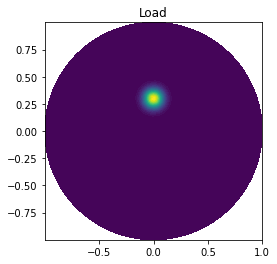

In [7]:
# Plot solution
p = interpolate(p, V)
plot(w, title='Deflection')
plot(p, title='Load')
interactive()
plt.show()